In [ ]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

In [ ]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [ ]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [ ]:
content_path = tf.keras.utils.get_file('Retratos-Barcelona-Maria-Actress-headshot-2.jpg', 'https://www.retratosbarcelona.com/wp-content/uploads/2020/02/Retratos-Barcelona-Maria-Actress-headshot-2.jpg')
style_path = tf.keras.utils.get_file('Vincent_van_Gogh_-_Self-Portrait_-_Google_Art_Project.jpg','https://upload.wikimedia.org/wikipedia/commons/b/b2/Vincent_van_Gogh_-_Self-Portrait_-_Google_Art_Project.jpg')
content_path_1 = tf.keras.utils.get_file('chelsea-clayton.jpg', 'https://northcarolinaphotographyschool.files.wordpress.com/2015/05/chelsea-clayton.jpg')
style_path_1 = tf.keras.utils.get_file('starry_night_full.jpg','https://www.vangoghgallery.com/img/starry_night_full.jpg')
content_path_2 = tf.keras.utils.get_file('highresscreenshot00000_0.png','https://www-learnsquared-com.s3.amazonaws.com/comments/highresscreenshot00000_0.png')
style_path_2 = tf.keras.utils.get_file('600px-Monet_-_Impression%2C_Sunrise.jpg', 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/59/Monet_-_Impression%2C_Sunrise.jpg/600px-Monet_-_Impression%2C_Sunrise.jpg')

In [ ]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [ ]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

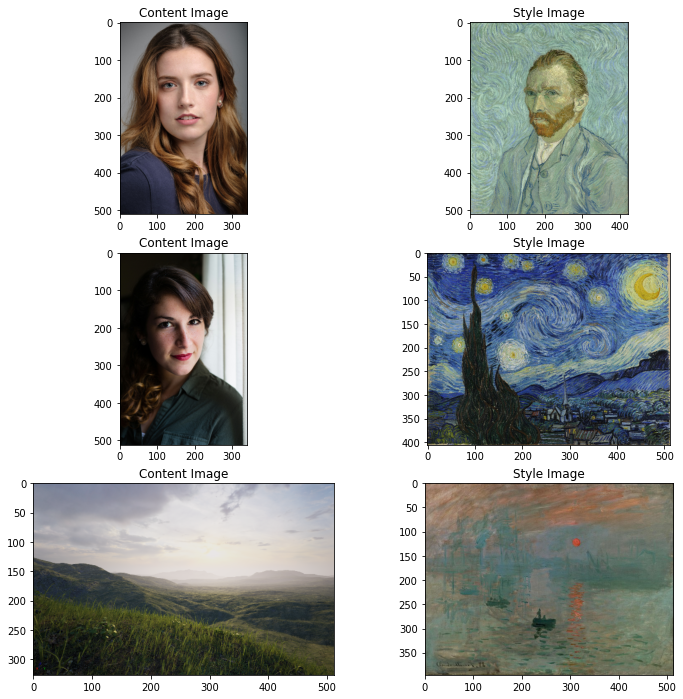

In [ ]:
content_image = load_img(content_path)
style_image = load_img(style_path)

content_image_1 = load_img(content_path_1)
style_image_1 = load_img(style_path_1)

content_image_2 = load_img(content_path_2)
style_image_2 = load_img(style_path_2)

plt.subplot(3, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(3, 2, 2)
imshow(style_image, 'Style Image')

plt.subplot(3, 2, 3)
imshow(content_image_1, 'Content Image')

plt.subplot(3, 2, 4)
imshow(style_image_1, 'Style Image')

plt.subplot(3, 2, 5)
imshow(content_image_2, 'Content Image')

plt.subplot(3, 2, 6)
imshow(style_image_2, 'Style Image')

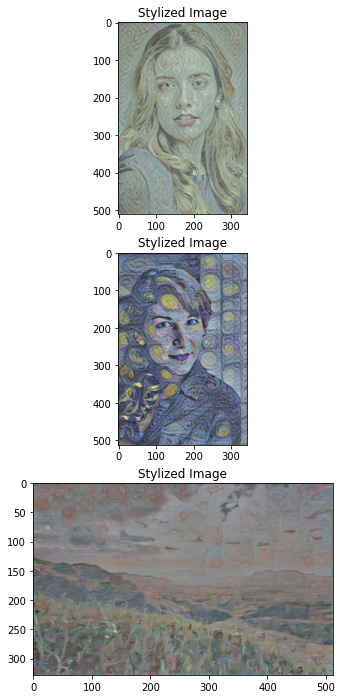

In [ ]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
hub_model_1 = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
hub_model_2 = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)

plt.subplot(3, 1, 1)
imshow(stylized_image, 'Stylized Image')

stylized_image_1 = hub_model_1(tf.constant(content_image_1), tf.constant(style_image_1))[0]
tensor_to_image(stylized_image_1)

plt.subplot(3, 1, 2)
imshow(stylized_image_1, 'Stylized Image')

stylized_image_2 = hub_model_2(tf.constant(content_image_2), tf.constant(style_image_2))[0]
tensor_to_image(stylized_image_2)

plt.subplot(3, 1, 3)
imshow(stylized_image_2, 'Stylized Image')